In [26]:
# importing relevant modules
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [35]:
# setting pararmeters
a = 1
b = 0.1
d= 0.1

In [36]:
# predator-prey equations
def pp(t,z,a,b,d):
    (x, y) = z
    return [x*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/x)]

In [37]:
from scipy.integrate import solve_ivp
sol = solve_ivp(pp, (0,100),(1,1), args=(a,b,d), rtol=1e-6)

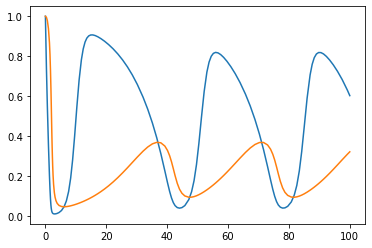

In [38]:
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])

In [ ]:
#When b>0.26 over a long-time limit there is convergence 
#When b<0.26 over a long-time limit the amplitude 

In [ ]:
#Determining an appropriate phase-condition for the limit cycle
x*(1-x) - (a*x*y)/(d+x) = 0